In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps

# Cvičení 8: Řešení soustav nelineárních algebraických rovnic

---
- [poznámky z přednášky - algebraické rovnice &  Newtonova metoda](https://www.karlin.mff.cuni.cz/~kucera/ZNM/1%20-%20Newtonova%20metoda.pdf)
- [poznámky z přednášky - iterace funkcí & věta o pevném bodu](https://www.karlin.mff.cuni.cz/~kucera/ZNM/2%20-%20Iterace%20funkci.pdf)
- další materiály
  - skripta [Kučera: Numerical methods for nonlinear equations](https://www.karlin.mff.cuni.cz/%7Ekucera/Numerical_Methods_for_Nonlinear_Equations.pdf) (Sekce 2.1, 2.3, 3.1, 3.2, 3.3)
  - skripta [Kelley: Solving Nonlinear Equations with Newton's Method](https://cuni.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma990013579040106986&context=L&vid=420CKIS_INST:UKAZ&lang=cs&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,Solving%20Nonlinear%20Equations%20with%20Newton%27s%20Method&mode=basic) (knihovna v karlíně)
  - skripta [Foundations of Applied Mathematics](https://foundations-of-applied-mathematics.github.io/) (Volume 1, Kapitola 10)

- ***Primární úlohy*** : A1, B1, B2

- ***Úlohy k bonusové části zkoušky*** : A3, B2, B3

- základní ***Learning outcomes*** (cviko, nikoliv přednáška)
  - Umím graficky demonstrovat různé vývoje aproximací Newtonovy metody (konvergence/divergence/oscilace) pro skalární problém.
  - Dokážu odvodit Newtonovu metody pro hledání kořenů vektorových funkcí.
  - Dokážu gfaficky znázornit/rozpoznat rozdíl mezi lineární a kvadratickou konvergencí posloupnosti.
  - Dokážu odvodit a analyzovat jednoduché fixed-point metody pro konkrétní reálné funkce.
  - Umím graficky demonstrovat různé vývoje aproximací fixed-point metody (konvergence/divergence/oscilace) pro skalární problém.

---

## Intro

V praxi je řešení soustav rovnic jednou z nejdůležitějších, ne-li tou nejdůležitější, operací a přirozeně nezůstává pouze u těch lineárních, které jsme řešili doposud. Mezi důležité aplikace patří například řešení diferenciálních rovnic nebo optimalizace.

Náš problém je tedy zadán jako

$$
\mathrm{Pro \; danou \; funkci} \; \mathbf{F} \, : \, \mathbb{R}^{n} \rightarrow \mathbb{R}^{n} \;  \mathrm{najdi \;} \mathbf{x}^{*} \; \mathrm{tak \; aby \; } \mathbf{F}(\mathbf{x}^{*})=0. \qquad (\star)
$$

V principu víme jak "přesně" řešit tento problém pouze pokud je $\mathbf{F}$ ***afinní***, tj. $\mathbf{F} \, : \, \mathbf{x} \mapsto A\mathbf{x} - \mathbf{b}$ pro nějakou danou matici $A$ a vektor $\mathbf{b}$ vhodných rozměrů. Pro takovou funkci hledání kořenů odpovídá řešení $A\mathbf{x} = \mathbf{b}$. Zde máme vybudovanou teorii z lineární algebry a různé postupy na řešení (Gaussova eliminace, QR-rozklad, ...).

Ale aplikace jsou bohužel neúprosné a často kořeny nelineárních funkcí zkrátka potřebujeme.

> Bez  explicitního vzorce řešení, který bychom mohli numeircky aproximovat přichází na řadu ***iterační matody***, tj. metody, které na základě aproximace $\mathbf{x}_0 \approx \mathbf{x}^*$ spočítají aproximaci (snad) lepší. To si můžeme napsat jako $\Phi(\mathbf{x}_0) =: \mathbf{x}_1 \approx \mathbf{x}^*$.

Idea je vcelku přímočará - vezmeme si nějaký počáteční odhad $\mathbf{x}_0$ a pomocí iteračních metod ho zpřesňujeme a tím získáváme posloupnost aproximací

$$
\mathbf{x}_0, \; \mathbf{x}_1 = \Phi(\mathbf{x}_0), \; \mathbf{x}_2 = \Phi(\mathbf{x}_1) = \Phi( \Phi(\mathbf{x}_0) ), \dotsc ,
$$

kde obecný $k$-tý prvek je dán jako $\Phi^k(\mathbf{x}_0) = \underbrace{\Phi(\dotsc (\Phi(\mathbf{x}_0)) )}_{k-\mathrm{krat}}$. Tomuhle "vrstvení" aplikace funkce se říká [iterated function](https://en.wikipedia.org/wiki/Iterated_function#Fractional_iterates_and_flows,_and_negative_iterates).


Na přednášce jsme viděli dvě základní myšlenky.

[***Metody typu Newton***](https://en.wikipedia.org/wiki/Newton%27s_method)

> Aproximujeme naší funkci $\mathbf{F}$ v bodě $\mathbf{x}_0$ lineární funkcí $\mathbf{L}_{\mathbf{x}_0}$ a místo $\mathbf{F}(\mathbf{x}) = 0$ budeme řešit $\mathbf{L}_{\mathbf{x}_0}(\mathbf{x}) = 0$. Řešení $\mathbf{L}_{\mathbf{x}_0}(\mathbf{x}) = 0$ označíme jako naše $\mathbf{x}_1$ a tedy dostáváme
>
>$$
\Phi \, : \, \mathbf{x}_0 \mapsto \mathbf{x}_1, \quad \mathrm{kde \;} \mathbf{x}_1 \; \mathrm{bereme \; tak \; \; aby \;} \mathbf{L}_{\mathbf{x}_0}(\mathbf{x}_1) = 0.
$$
>
> Asi nejpřirozenějším způsobem jak volit $\mathbf{L}_{\mathbf{x}_0}$ na základě $\mathbf{F}$ ja z Taylorova rozvoje. Označíme-li matici prvních derivací funkce $\mathbf{F}$ v bodě $\mathbf{x}_0$ jako $J_{\mathbf{x}_0}$, pak máme pro $\mathbf{x}$ v okolí $\mathbf{x}_0$
>
>$$
\mathbf{F}(\mathbf{x}) \approx \mathbf{F}(\mathbf{x}_0) + J_{\mathbf{x}_0}(\mathbf{x}-\mathbf{x}_0) + \mathcal{O} \left( \| \mathbf{x} - \mathbf{x}_0 \|^2 \right)
$$
>
> a tedy dostáváme
>
>$$
\mathbf{L}_{\mathbf{x}_0} \, : \, \mathbf{x} \mapsto  \mathbf{F}(\mathbf{x}_0) + J_{\mathbf{x}_0}(\mathbf{x}-\mathbf{x}_0), \quad \mathrm{a \; tedy} \\
\Phi \, : \, \mathbf{x}_0 \mapsto \mathbf{x}_1, \quad \mathrm{kde \;} \mathbf{x}_1 \; \mathrm{bereme \; tak \; \; aby \;}  J_{\mathbf{x}_0}\mathbf{x}_1 = J_{\mathbf{x}_0}\mathbf{x}_0 - \mathbf{F}(\mathbf{x}_0) .
$$
>
> Pokud budeme s $\mathbf{x}_0$ dostatešně blízko kořenu $\mathbf{x}^*$ (a nebo pokud se dostatečně blízko dostaneme v naší posloupnosti $\mathbf{x}_0,\mathbf{x}_1,\dotsc$) pak Newotonova metoda bude konvergovat alespoň kvadraticky.
> Způsobů, jak vybrat $\mathbf{L}_{\mathbf{x}_0}$ je více - obecně takové metody nazíváme tzv. *quasi-Newton methods*.
>
> Všimněme si, že každá iterace těchto metod vyžaduje řešení soustavy *lineárních* algebraických rovnic - jinými slovy, převádíme nelineární problém na sekvenci lineárních, tzv. "linearizujeme".



[***Fixed-point metody***](https://en.wikipedia.org/wiki/Fixed-point_iteration)
> Obecně tyto metody řeší tzv. *fixed point porblém*, tj.
>
>$$
\mathrm{Pro \; danou \; funkci} \; \mathbf{G} \, : \, \mathbb{R}^{n} \rightarrow \mathbb{R}^{n} \;  \mathrm{najdi \;} \mathbf{z}^{*} \; \mathrm{tak \; aby \; } \mathbf{G}(\mathbf{x}^{*})=\mathbf{x}^{*}.
$$
>
> Idea je volit $\mathbf{G}$ *chytře*, tj. tak aby platilo
>
>$$
 \mathbf{G}(\mathbf{x}^{*})=\mathbf{x}^{*} \quad \Rightarrow \quad \mathbf{F}(\mathbf{x}^{*}) = 0
$$
>
> a my mohli použít metody na hledání pevného bodu $\mathbf{G}$ k nalezení kořene $\mathbf{F}$.
> Na hledání pevného bodu dané funkce $\mathbf{G}$ máme z přednášky jeden nástroj a to je [Banachově věta o kontrakci](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem#Applications):
  - Mějme funkci $\mathbf{G}\, :\, \mathcal{M}\rightarrow \mathcal{M}$, pro kterou platí
    - $\mathbf{G} : \mathcal{M}\rightarrow \mathcal{M}$ je spojitá,
    - $\mathcal{M} \subset \mathbb{R}^{n}$ je uzavřená,
    - $\mathbf{G}(\mathbf{x})$ je kontrakce.
>  
> - Pak volbou posloupnost $\mathbf{x}_0,\mathbf{G}(\mathbf{x}_0),\mathbf{G}(\mathbf{G}(\mathbf{x}_0)), \dotsc$ konverguje k pevnému bodu $\mathbf{x}^{*}$ funkce $\mathbf{G}$. Jinými slovy, bereme $\Phi = \mathbf{G}$ a počítáme posloupnost aproximací jako výše.
>
> Díky Banachově větě o kontrakci máme zaručenou alespoň lineární konvergenci této posloupnoti k pevnéhmu bodu $\mathbf{G}$ a tedy i ke kořenu $\mathbf{F}$.



### Úloha 0

---
**Tužka a papír** : Co lze/nelze říci o podmíněnosti problému $(\star)$? Uveďte příklad, kdy je dobře podmíněný a kdy je špatně podmíněný.

---

## Část A: Newtonova metoda

Jak jsme viděli výše, tak pro použití Newtonovy metody pro nalezení kořene funkce $\mathbf{F}$ budeme opakovaně používat předpis

$$
J_{\mathbf{x}_k}\mathbf{x}_{k+1} = J_{\mathbf{x}_k}\mathbf{x}_k - \mathbf{F}(\mathbf{x}_k) \quad \mathrm{pro} \; k=1,2,\dotsc,
$$

který odpovídá řešení lineárního systému

$$
\mathbf{x}_{k+1} = \mathbf{x}_k + \mathbf{v}_k, \quad \mathrm{kde} \quad J_{\mathbf{x}_k} \mathbf{v} = - \mathbf{F}(\mathbf{x}_k) \quad \mathrm{pro} \; k=1,2,\dotsc,
$$


Je tedy zjevné, že budeme potřebovat vyhodnocovat nejen $\mathbf{F}$ ale i všechny parciální derivace $\mathbf{F}$, tj. tzv. Jakobián

$$
J_{\mathbf{x}_k} :=
\begin{bmatrix}
\frac{\partial F_1 }{ \partial x_1 } & \frac{ \partial F_1 }{ \partial x_2 } & \dots & \frac{ \partial F_1 }{ \partial x_n } \\
\frac{ \partial F_2 }{ \partial x_1 } & \frac{ \partial F_2 }{ \partial x_2 } & \dots & \frac{ \partial F_2 }{ \partial x_n } \\
\vdots & \vdots & \ddots & \vdots \\
\frac{ \partial F_n }{ \partial x_1 } & \frac{ \partial F_n }{ \partial x_2 } & \dots & \frac{ \partial F_n }{ \partial x_n } \\
\end{bmatrix}(\mathbf{x}_k)
\equiv
\begin{bmatrix}
\frac{\partial F_1 }{ \partial x_1 }(\mathbf{x}_k) & \frac{ \partial F_1 }{ \partial x_2 }(\mathbf{x}_k) & \dots & \frac{ \partial F_1 }{ \partial x_n }(\mathbf{x}_k) \\
\frac{ \partial F_2 }{ \partial x_1 }(\mathbf{x}_k) & \frac{ \partial F_2 }{ \partial x_2 }(\mathbf{x}_k) & \dots & \frac{ \partial F_2 }{ \partial x_n }(\mathbf{x}_k) \\
\vdots & \vdots & \ddots & \vdots \\
\frac{ \partial F_n }{ \partial x_1 }(\mathbf{x}_k) & \frac{ \partial F_n }{ \partial x_2 }(\mathbf{x}_k) & \dots & \frac{ \partial F_n }{ \partial x_n }(\mathbf{x}_k) \\
\end{bmatrix}.
$$

My se budeme zajímat o chování Newtonovy metody.


### Úloha A1 - implementace

---
**Kódění** : Naimplementujte funkci `NewtonovaMetoda()` podle anotace níže.
  - na řešení lineárního systému použijte [np.linalg.solve](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html) (ale v tuhle chvíli už máme solidní arsenál metod),
  - pokud je $n=1$, pak je lineární systém triviální, takže nevolejte řešič, ale rovnou napište "formulku z přednášky".
  - dávejte si pozor na správnou implementaci konvergenčního kritéria. Možná se bude hodit příkaz [`break`](https://www.geeksforgeeks.org/python/python-break-statement/).

**Kódění** : Vezmeme si funkci $f(x) = x^3 - x$.
  - Jaká jsou přesná řešení?
  - Doplňte následující dvě buňky kódu tak, aby vykreslovaly
    - sekvenci bodů Newtonovy metody pro tři různé počáteční aproximace $x_0 = 0.4472, x_0 = 1/\sqrt{5} \approx 0.44721\dotsc$ a $x_0 = 0.4473$ (označené indexy "l", "m" a "r" pro *left*, *middle* a *right*).
    - chybu Newtonovy metody v závislosti na počtu iterací, tedy $|x^* - x_k|$, kde $x^*$ je ten z kořenů $f$, ke kterému Newtonova metoda konverguje, pokud konverguje (jako vždy, používáme [`plt.semilogy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html)).

----

In [ ]:
def NewtonovaMetoda(f, df, x0, max_iter, tol, Vykresli=False):
  """
  Newtonova metoda pro reseni soustavy nelinearnich algebraickych rovnic "f(x)=0".

  Input
  -------
  f :   python funkce (callable). Funkce vyhodnocujici hodnoty "f : R^n -> R^n",
        syntax "f( np.array([x1,...,xn]) )". Tj. nevolame funkci jako funkci "n" promennych, ale jako funkci s jednim inputem - vektorem z R^n
  df :  python funkce (callable). Funkce vyhodnocujici hodnoty derivace funkce "f", "f : R^n -> R^{n*n}"
        syntax "f( np.array([x1,...,xn]) )". Tj. nevolame funkci jako funkci "n" promennych, ale jako funkci s jednim inputem - vektorem z R^n
  x0 :  np.array dimenze "n" s prvky np.float64. Pocatecni aproximace korene
  max_iter : np.int32. Maximalni pocet iteraci algoritmu, max_iter > 0
  tol : np.float64. Tolerance chyby ve vyslednem reseni - vyzadujeme, aby zaroven platilo:
          - "norm( x_k - x_{k-1} ) < tol",
          - "norm( f(x_k) ) < tol",
        tzn., algoritmus vrati output po iteraci "k", ve ktere jsou obe tyto podminky splneny.
        Pokud pro nejake "k < max_iter" jsou obe podminky splneny, rekneme, ze algoritmus "zkonvergoval" a uz nebudeme pocitat dalsi aproximace.
        Pokud pro zadne  "k < max_iter" nejsou obe podminky splneny, spocitame "k" iteraci.

  Output
  -------
  AproximaceKorene: np.array dimenze "d-krat-(max_iter+1)". Musi platit "AproximaceKorene[:,i] = xi", kde "xi" je i-ta iterace/aproximace korene "f" (tj. na vystupu vracime celou posloupnost aproximaci, vcetne te nulte)
  PocetIteraci:    np.int32. Pocet provedenych iteraci

  Poznamka
  -------
  Aproximace x0, x1, ... generovane timto algoritmem by mely byt ulozeny v poli "AproximaceKorene[0:PocetIteraci+1,:]" - radek po radku. Konkretne finalni aproximace bude ulozena v poli "AproximaceKorene[:,PocetIteraci]".
  """
  # Vas kod
  n = np.size(x0); AproximaceKorene = np.nan*np.zeros((n,max_iter+1))
  AproximaceKorene[:,0] = x0

  for k in range(1,max_iter+1):

    if n == 1:
      AproximaceKorene[:,k] = AproximaceKorene[:,k-1] - f(AproximaceKorene[:,k-1])/df(AproximaceKorene[:,k-1])

    elif n > 1:
      AproximaceKorene[:,k] = AproximaceKorene[:,k-1] - np.linalg.solve( df(AproximaceKorene[:,k-1]), f(AproximaceKorene[:,k-1]))

    if ( np.linalg.norm(AproximaceKorene[:,k] - AproximaceKorene[:,k-1]) < tol ) and ( np.linalg.norm(f(AproximaceKorene[:,k])) < tol ):
        break

  return AproximaceKorene, k



####################################################################################
def test_NewtonovaMetoda():
  def fun1(x):
    return x**2
  def dfun1(x):
    return 2*x

  def fun1vec(x):
    return x**2
  def dfun1vec(x):
    return 2*x*np.eye(len(x))

  def fun2(x):
    return np.cos(x**2)
  def dfun2(x):
    return -2*x*np.sin(x**2)

  x0 = 5; maxit = 10; tol = 1e-8
  AproxNewton, PocetIter = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol)
  assert AproxNewton[:,0] == x0, "Neplati 'AproximaceKorene[:,0] = x0' pro skalarni funkce."
  assert AproxNewton.shape == (np.size(x0),maxit+1), "Ouput 'AproximaceKorene' ma rozmery {}, pro skalarni funkci a 'max_iter = {}'.".format(AproxNewton.shape,maxit)
  assert np.allclose( AproxNewton.reshape((np.size(AproxNewton),)), 5*(2.)**(np.arange(0,-(maxit+1),-1)) ), "Spatny output pro skalarni pripad 'f(x)=x^2, x0={}, max_iter={}, tol={}' - porovnejte s vypoctem tuzka-a-papir.".format(x0,maxit,tol)

  x0 = 5*np.ones(5); maxit = 10; tol = 1e-8
  AproxNewton, PocetIter = NewtonovaMetoda(fun1vec, dfun1vec, x0, maxit, tol)
  assert np.linalg.norm(AproxNewton[:,0] - x0) < 1e-15, "Neplati 'AproximaceKorene[:,0] = x0' pro vektorove funkce."
  assert AproxNewton.shape == (np.size(x0),maxit+1),"Ouput 'AproximaceKorene' ma rozmery {}, pro vektorovou funkci z R{} do R{} a 'max_iter = {}'.".format(AproxNewton.shape,np.size(x0),np.size(x0),maxit)
  assert np.allclose( AproxNewton, np.outer( np.ones(np.size(x0)) , 5*(2.)**(np.arange(0,-(maxit+1),-1))  ) ), "Spatny output pro skalarni pripad 'f(x)=[x^2,...,x^2], x0={}, max_iter={}, tol={}' - porovnejte s vypoctem tuzka-a-papir.".format(x0,maxit,tol)

  x0 = 1; maxit = 10; tol = 1e-6
  AproxNewton, PocetIter = NewtonovaMetoda(fun2, dfun2, x0, maxit, tol)
  NewtonAprox_scipy,FullOut = newton(fun2, x0, fprime=dfun2, maxiter=maxit, tol=tol, full_output=True)[0:2]; pocetiter = FullOut.iterations
  assert np.abs( AproxNewton[:,PocetIter] - NewtonAprox_scipy) <= 1e-12, "Spatny output funkce NewtonovaMetoda() pro 'f(x)=cos(x^2), x0={}, max_iter={}, tol={}'. \n Vysledna aproximace ma byt {}".format(x0,maxit,tol,NewtonAprox_scipy)

  x0 = 1; maxit = 10; tol = 1e-14
  AproxNewton, PocetIter = NewtonovaMetoda(fun2, dfun2, x0, maxit, tol)
  NewtonAprox_scipy,FullOut = newton(fun2, x0, fprime=dfun2, maxiter=maxit, tol=tol, full_output=True)[0:2]; pocetiter = FullOut.iterations
  assert AproxNewton.shape == (np.size(x0),maxit+1), "Spatny output funkce Newton()"
  assert np.abs( AproxNewton[:,PocetIter] - NewtonAprox_scipy) <= 1e-12, "Spatny output funkce NewtonovaMetoda() pro 'f(x)=cos(x^2), x0={}, max_iter={}, tol={}'. \n Vysledna aproximace ma byt {}".format(x0,maxit,tol,NewtonAprox_scipy)
  return '"NewtonovaMetoda()" je OK'

from scipy.optimize import newton
test_NewtonovaMetoda()

'"NewtonovaMetoda()" je OK'

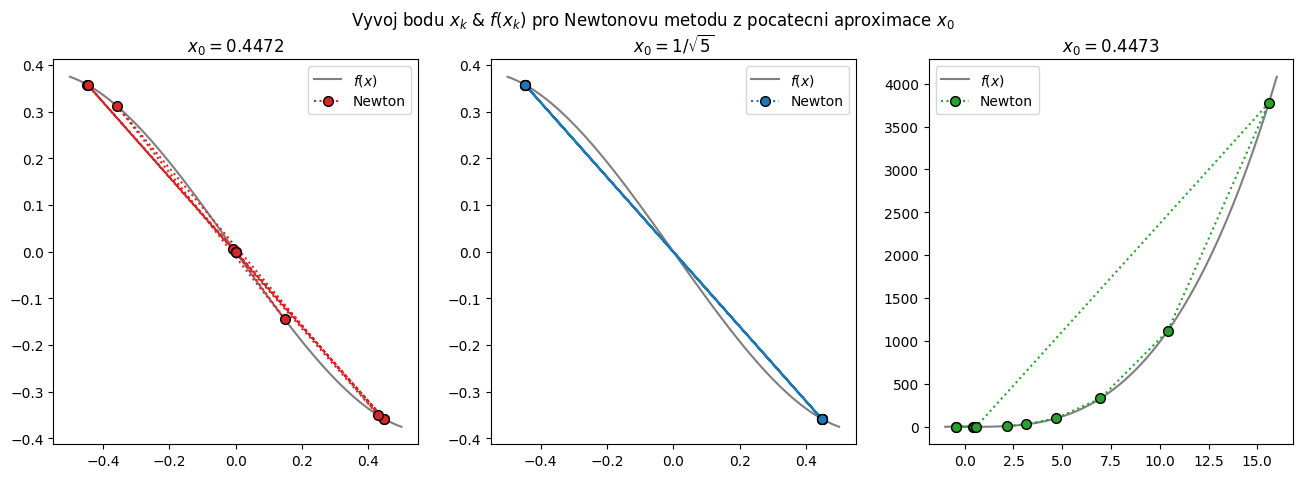

In [ ]:
def fun1(x):
  return x**3-x
def dfun1(x):
  return 3*x**2 - 1

maxit = 10; tol = 1e-8

x0 = 0.4472
AproxNewton_l, PocetIter_l = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol);
x0 = 1/np.sqrt(5)
AproxNewton_m, PocetIter_m = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol);
x0 = 0.4473
AproxNewton_r, PocetIter_r = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol);


################################################# Vykreslovani - neni treba menit, pokud nechcete menit experiment
MyMesh_left = np.linspace(-.5,.5,100); MyMesh_mid = np.linspace(-.5,.5,100); MyMesh_right = np.linspace(-1,16,100)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(MyMesh_left, fun1(MyMesh_left), color = 'tab:gray', label=r'$f(x)$')
plt.plot(AproxNewton_l.reshape((np.size(AproxNewton_l),))[0:PocetIter_l+1], fun1(AproxNewton_l.reshape((np.size(AproxNewton_l),))[0:PocetIter_l+1]), 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label=r'Newton'); plt.title(r'$x_0 = 0.4472$'); plt.legend()
plt.subplot(1,3,2)
plt.plot(MyMesh_mid, fun1(MyMesh_mid), color = 'tab:gray', label=r'$f(x)$')
plt.plot(AproxNewton_m.reshape((np.size(AproxNewton_m),))[0:PocetIter_m+1], fun1(AproxNewton_m.reshape((np.size(AproxNewton_m),))[0:PocetIter_m+1]), 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label=r'Newton'); plt.title(r'$x_0 = 1/\sqrt{5}$'); plt.legend()
plt.subplot(1,3,3)
plt.plot(MyMesh_right, fun1(MyMesh_right), color = 'tab:gray', label=r'$f(x)$')
plt.plot(AproxNewton_r.reshape((np.size(AproxNewton_r),))[0:PocetIter_r+1], fun1(AproxNewton_r.reshape((np.size(AproxNewton_r),))[0:PocetIter_r+1]), 'o:', ms = 7, color = 'tab:green', markeredgecolor='k', label=r'Newton'); plt.title(r'$x_0 = 0.4473$'); plt.legend()
plt.suptitle("Vyvoj bodu $x_k$ & $f(x_k)$ pro Newtonovu metodu z pocatecni aproximace $x_0$");
plt.show()

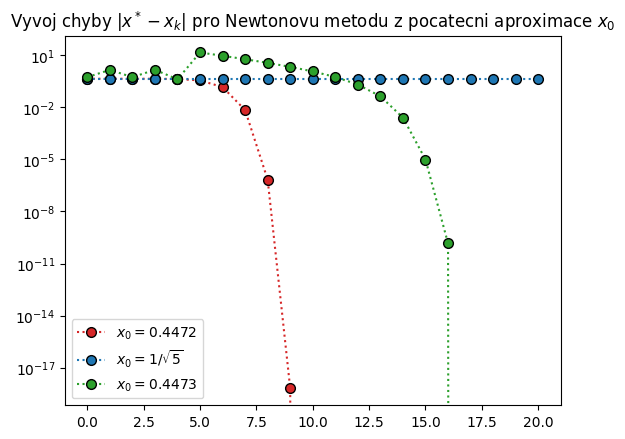

In [ ]:
def fun1(x):
  return x**3-x
def dfun1(x):
  return 3*x**2 - 1

maxit = 20; tol = 1e-8

x0 = 0.4472
AproxNewton_l, PocetIter_l = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol); errNewton_l = np.abs( AproxNewton_l.reshape((np.size(AproxNewton_l),)) - 0 )
x0 = 1/np.sqrt(5)
AproxNewton_m, PocetIter_m = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol); errNewton_m = np.abs( AproxNewton_m.reshape((np.size(AproxNewton_m),)) - 0 )
x0 = 0.4473
AproxNewton_r, PocetIter_r = NewtonovaMetoda(fun1, dfun1, x0, maxit, tol); errNewton_r = np.abs( AproxNewton_r.reshape((np.size(AproxNewton_r),)) - 1 )


################################################# Vykreslovani - neni treba menit, pokud nechcete menit experiment
plt.semilogy(errNewton_l, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label=r'$x_0 = 0.4472$');
plt.semilogy(errNewton_m, 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label=r'$x_0 = 1/\sqrt{5}$');
plt.semilogy(errNewton_r, 'o:', ms = 7, color = 'tab:green', markeredgecolor='k', label=r'$x_0 = 0.4473$');
plt.xlabel("iterace $k$"); plt.title("Vyvoj chyby $|x^*-x_k|$ pro Newtonovu metodu z pocatecni aproximace $x_0$"); plt.legend(); plt.show()

### Úloha A2 - Newtonův fraktál

V minulé úloze jsme viděli, že volba počátečního bodu může mít velký dopad na (ne)konvergenci. Zkusíme si s tímto jevem trochu více pohrát. Vezmeme si ***komplexní funkci komlexní proměnné*** $f(z) = z^3-1 \in \mathbb{C}$ s kořeny

$$
z_1 = -\frac{1}{2} + i\frac{\sqrt{3}}{2}, \quad z_2 = -\frac{1}{2} - i\frac{\sqrt{3}}{2}, \quad z_3 = 1.
$$

---
**Tužka a papír** :
- Přepište $f(z)$ jako funkci $\mathbf{F}(\mathbf{x}) : \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$ podle klasické identifikace $\mathbb{C}$ s $\mathbb{R}^{2}$, tj.
  - $z\equiv \mathbf{x} = [\mathrm{Re}(z),\mathrm{Im}(z)]$,
  - $\mathrm{Re}(f(z)) = \mathbf{F}(\mathbf{x})_1$,
  - $\mathrm{Im}(f(z)) = \mathbf{F}(\mathbf{x})_2$.
  
  Pro daný bod $\mathbf{x} = [x_1,x_2]^T \in \mathbb{R}^2$ spočítejte derivaci $J_{\mathbf{x}}\in \mathbb{R}^{2\times 2}$ funkce $\mathbf{F}$.

**Kódění** :
- Naimplementujte funkci `KamKonvergujeNewton()` podle anotace níže.

- Využijte funkci `KamKonvergujeNewton()` k doplnění předpřipraveného kódu v buňce níže a vykreslení tzv. [Newtonova fraktálu](https://en.wikipedia.org/wiki/Newton_fractal).

  - *Krok 1* : vygenerujeme síť bodů ve čtverci $[-1,1]\times [-1,1]$.
  To uděláme tak, že vygenerujeme rovnoměrně rozložené body $\xi_1,\dotsc ,\xi_N$ v intervalu $[-1,1]$ a pak vezmeme "všechny dvojice" $[\xi_i,\xi_j]$. Naštěstí an tohle existuje funkce [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

  - *Krok 2* : pro každý bod $[\xi_i,\xi_j] \in \mathbb{R}^2$ otestujeme, ke kterému z kořenů funkce $\mathbf{F}$ konverguje _Newtonova metoda z tohoto bodu pomocí `KamKonvergujeNewton()`. Výsledek (tj. index $0,1,2$ nebo $3$) si uložíme do pole `KamKonverguju`.
  
  - Obrázky níže odpovídají počtu bodů $N = 350$ (kód poběží cca 2-3 minuty). Zkuste experimentovat s různým počtem bodů.

  - Esteticky naladění/é si můžou vybrat v jakých barvách se bude fraktál zobrazovat skrze parametr `VolbaBarvicek` - lze volit z siroke nabidky v pythonu, změnou `virdis` na libovolné jiné `keyword` ze [seznamu](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

- Zopakujte pro 3 různé "zoom-in", tj. pro body v $[-0.5,0.5]^2, [-1,1]^2$ a $[-2,2]^2$.

- [Navíc] Zkuste si najít váš oblínený Newtonův fraktál různámi volbami $f(z)$, např. $f(z) = z^3 - 2z + 2$ nebo $f(z) = \sin(z)$.
----

>Pokud se chcete dozvědět více o fraktálech, tak apn přednášející má an toto téma výběrovou přednášku [NMNV361: Fraktály a chaotická dynamika](https://www.karlin.mff.cuni.cz/~kucera/Frakt_chaot_dyn.html).

In [ ]:
def KamKonvergujeNewton(Koreny, f, df, x0, max_iter, tol):
  '''
  Pro dany pocatecni bod x0 vratime Newtonova metoda pro reseni soustavy nelinearnich rovnic "f(x)=0".

  Input
  -------
  Koreny : numpy array rozmeru "PocetKorenu-krat-2". V kazdem radku jsou napsany dve souradnice x1, x2 jednoho z korenu funkce "f"
  -- zbytek inputu je stejny jako u "NewtonovaMetoda()" --

  Output
  -------
  Pokud "NewtonovaMetoda(f,df,x0,maxit,tol)" zkonvergovala k nejakemu z korenu (ve smyslu "||x_k - Koren_1|| < tol"), vratime poradi toho korenu (napr. vratime "1" pokud Newton zkonvergoval k prvnimu korenu, tj. k "Koreny[0,:]").
  Pokud "NewtonovaMetoda(f,df,x0,maxit,tol)" nezkonvergovala, vratime 0.
  '''
  # Vas kod
  PocetKorenu = ...
  NewtonAproximace, PocetIter = ...
  FinalniNewtonAproximace = ...

  for ind_korene in range(0,PocetKorenu):

    MujOutput = 0
    if ... :
      MujOutput = ...

  return MujOutput

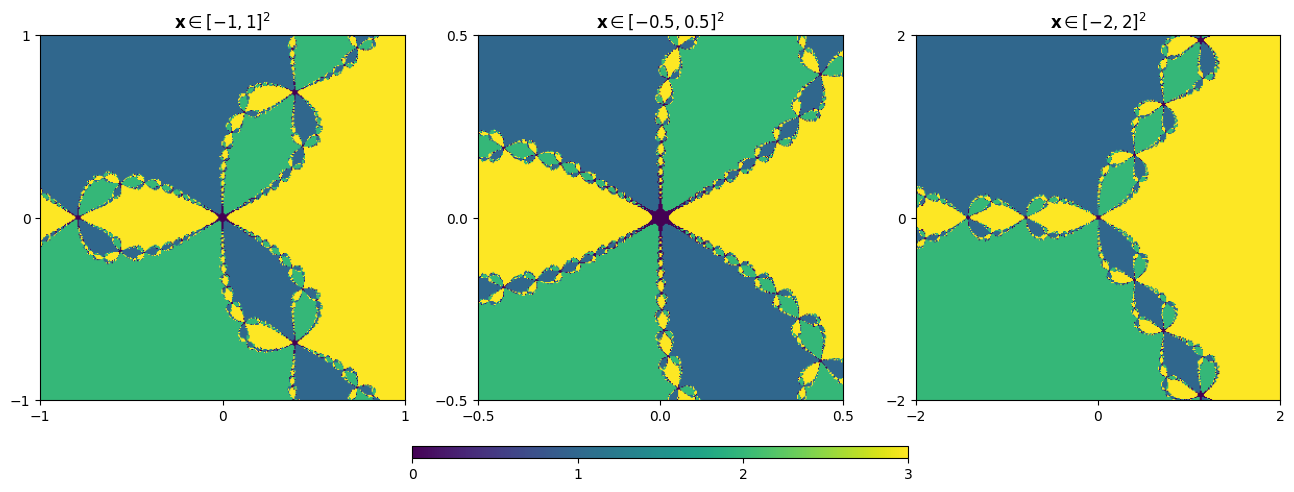

In [ ]:
################################################# Vykreslovani - neni treba menit, pokud nechcete menit experiment
def fun_F(x):
  return np.asarray( [x[0]**3 - 3 * x[0] * x[1]**2 - 1, 3 * x[0]**2 * x[1] - x[1]**3] )
def dfun_F(x):
  return np.asarray( [[3 * x[0]**2 - 3 * x[1]**2, -6 * x[0] * x[1]], [6 * x[0] * x[1], 3 * x[0]**2 - 3 * x[1]**2]] )

max_iter = 20; tol = 1e-6; N = 350
Koreny = np.array([ [-1/2, np.sqrt(3)/2] , [-1/2, -np.sqrt(3)/2] , [1,0] ])
VolbaBarvicek = cmaps['viridis']

### Diskretizace čtverce [-1,1]^2
# Krok 1
mesh_1D = np.linspace(-1, 1, N) # vygenerujeme N bodu xi_1, ..., xi_N na [-1,1] vcetne kraju - napr. "np.linspace(2,3,5) = [2., 2.25, 2.5 , 2.75, 3.]"
X1,X2 = np.meshgrid(mesh_1D, mesh_1D) # body [xi_i,xi_j] ziskame jako [ X1[i,j],X2[i,j] ]
# Krok 2
KamKonverguju_sqr1 = np.zeros((N, N))
for i in range(0,N):
    for j in range(0,N):
        x0 = np.asarray([X1[i, j], X2[i, j]])
        KamKonverguju_sqr1[i, j] = KamKonvergujeNewton(Koreny, fun_F, dfun_F, x0, max_iter, tol)

# Diskretizace čtverce [-0.5,0.5]^2
mesh_1D = np.linspace(-0.5, 0.5, N)
X1,X2 = np.meshgrid(mesh_1D, mesh_1D)

KamKonverguju_sqrHalf = np.zeros((N, N))
for i in range(0,N):
    for j in range(0,N):
        x0 = np.asarray([X1[i, j], X2[i, j]])
        KamKonverguju_sqrHalf[i, j] = KamKonvergujeNewton(Koreny, fun_F, dfun_F, x0, max_iter, tol)

# Diskretizace čtverce [-2,2]^2
mesh_1D = np.linspace(-2, 2, N)
X1,X2 = np.meshgrid(mesh_1D, mesh_1D)

KamKonverguju_sqr2 = np.zeros((N, N))
for i in range(0,N):
    for j in range(0,N):
        x0 = np.asarray([X1[i, j], X2[i, j]])
        KamKonverguju_sqr2[i, j] = KamKonvergujeNewton(Koreny, fun_F, dfun_F, x0, max_iter, tol)


################################################# Vykreslovani - neni treba menit, pokud nechcete menit experiment
fig = plt.figure(figsize=(16,7))
ax1 = plt.subplot(1,3,1)
plt.imshow(KamKonverguju_sqr1, extent=[-1, 1, -1, 1], origin='lower', cmap=VolbaBarvicek); plt.xticks([-1, 0, 1]); plt.yticks([-1, 0, 1]); plt.title(r'$\mathbf{x} \in [-1,1]^2$')
ax2 = plt.subplot(1,3,2)
plt.imshow(KamKonverguju_sqrHalf, extent=[-.5, .5, -.5, .5], origin='lower', cmap=VolbaBarvicek); plt.xticks([-.5, 0, .5]); plt.yticks([-.5, 0, .5]); plt.title(r'$\mathbf{x} \in [-0.5,0.5]^2$')
ax3 = plt.subplot(1,3,3)
plt.imshow(KamKonverguju_sqr2, extent=[-2, 2, -2, 2], origin='lower', cmap=VolbaBarvicek); plt.xticks([-2, 0, 2]); plt.yticks([-2, 0, 2]); plt.title(r'$\mathbf{x} \in [-2,2]^2$')
cbar = plt.colorbar(ticks = [0, 1, 2, 3], location = 'bottom', ax =np.asarray([ax1,ax2,ax3]), shrink=.4, aspect=40, pad=0.085)
plt.show()

### Úloha A3

Newtonova metoda je sice primárně metoda určená pro řešení *nelineárních* algebraických rovnic, ale může být zjevně (nic nám v tom nebrání) i pro řešení problémů z první části semestru. Vezmeme si matici $A\in \mathbb{R}^{2\times 2}$ a $\mathbf{b} \in \mathbb{R}^2$, a chceme najít vektor $\mathbf{x} \in \mathbf{R}^2$ splňující
$A \mathbf{x}= \mathbf{b}$ , nebo-li $
\begin{bmatrix}
a_{11} & a_{12} \\ a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} =
\begin{bmatrix}
b_1 \\ b_2
\end{bmatrix}$

---
**Tužka a papír**:
- Zadefinujte odpovídající funkci $\mathbf{F}(\mathbf{x}) \, : \, \mathbb{R}^2 \rightarrow \mathbb{R}^2$ pro kterou je $\mathbf{x}$ kořenem.

- Odvoďte explicitní předpis Newtonovy metody pro dané $A$ a $\mathbf{b}$.

- Okomentujte praktičnost/použitelnost Newtonovy metody pro soustavy lineárních rovnic v praxi.
----


### ZÚ - analýza Newtonovy metody jinak


Na základě A2 by se mohlo zdát, že ikdyž je teorie "pesimistická", tak Newton vlastně "skoro vždycky konverguje". Realita je bohužel jiná a to i "pouze" v jedné proměnné, natož pro vektorové funkce. Zobecníme funkce z A1 a vezmeme si

$$
f_{\lambda}(x) = x^3 - x + \lambda,
$$

funkci, která je parametrizovaná skalárem $\lambda$, který může být reálný nebo komplexní. V A1 jsme viděli, že metoda se pro $x_0=1/\sqrt{5}$ zasekla v tzv. ***2-cyklu*** a oscilovala mezi dvěma body a pro jiné $x_0$ naopak konvergovala k jednomu z kořenů.

---
**Tužka a papír**:

- Napište explicitní vzorec pro jeden krok Newtonovy metody, tj. najděte funkci $g_{\lambda}(x)$ takovou, že platí

  $$
  x_{k+1} = g_{\lambda}(x_k).
  $$

- Odvoďte pro které $x_k$ a $\lambda$ bude Newtonova metoda  oscilovat ve 2-cyklu, tj. bude platit, že pro všechna $\ell = 0,1,2,\dotsc$ platí

  $$
  x_{k+2\ell} = x_{k} \quad \mathrm{a} \quad x_{k+2\ell + 1} = x_{k+1}.
  $$

  Není zapotřebí tuto podmínku vyřešit, stačí ji nechat v implicitní formě, např.
  $$ \mathrm{musi\; platit\,:\,} \quad \sin(2\pi \lambda) + e^{x_k} = \sqrt{2}$$
  
  - Jak by vypadala analogická podmínka pro 3-cyklus nebo 17-cyklus?
  - Jak by vypadala podmínka pro $x_k$ a $\lambda$, aby Newtonova metoda zkonvergovala po 3 nebo 17 iterací?
  - Jak by vypadala podmínka pro $x_k$ a $\lambda$, aby Newtonova metoda  "crashnula" (tj. nulová derivace $f$ v bodě $x_k$) po 3 nebo 17 iterací?
  - Co mají tyto podmínky společného? Zkuste spojit vaše pozorování s výsledky 2. cvičení o podmíněnosti a stabilitě (poslední část). Vztáhněte vaše pozorování/odvození ke stabilitě Newtonovy metody.

**Tužka a papír**: Vezmeme si hladkou, roustoucí a ryze konvexní funkci $f : \mathbb{R}\rightarrow \mathbb{R}$ s kořenem $x^*$. Ukažte, že Newtonova metoda bude konvergovat pro libovolné $x_0$.
  - Co by se změnilo, kdyby $f$ byla ryze konkávní a/nebo klesající?
  - Lze zeslabit dané vlastnosti $f$ z $\mathbb{R}$ na jiný, menší interval?
  <details>
  <summary>Chci <font color="red"><b>hint</b></font></summary>
  
  Zkuste použít [Větu o konvergenci omezené neklesající/nerostoucí posloupnosti](https://en.wikipedia.org/wiki/Monotone_convergence_theorem) :
  
  > Mějme posloupnosti $a_1 \leq a_2 \leq a_3 \leq \dotsc \leq M \in \mathbb{R}$ a $b_1 \geq b_2 \geq b_3 \geq \dotsc \geq m \in \mathbb{R}$. Obě tyto posloupnosti konvergují a to k $\sup a_i$ a $\inf b_i$.

  
  </details>

----

**Řešení** :

- $f'(x) = 3x^2-1$ a tedy $g_{\lambda}(x) = x - \frac{x^3-x+\lambda}{3x^2-1} = \frac{2x^3-\lambda}{3x^2-1}$
- $x_{k+2} = x_k \iff g_{\lambda}(g_{\lambda}(x_k)) = x_k \iff \frac{2\left(\frac{2x_k^3-\lambda}{3x_k^2-1}\right)^3-\lambda}{3\left(\frac{2x_k^3-\lambda}{3x_k^2-1}\right)^2-1} = x_k \iff \dotsc \iff
\frac{16x_k^9 - 51 \lambda x_k^6 + 27 \lambda x_k^4 + 12 \lambda^2 x_k^3 - 9 \lambda x_k^2 + \lambda-2\lambda^3 }{(3x_k^2 - 1) (12x_k^6 - 9x_k^4- 12 \lambda x_k^3 + 6x_k^2 + 3 \lambda^2 - 1)} = x_k \iff  16x_k^9 - 51 \lambda x_k^6 + 27 \lambda x_k^4 + 12 \lambda^2 x_k^3 - 9 \lambda x_k^2 + \lambda-2\lambda^3 - x_k(3x_k^2 - 1) (12x_k^6 - 9x_k^4- 12 \lambda x_k^3 + 6x_k^2 + 3 \lambda^2 - 1) = 0$

- tedy v našem případě (a obecně pro $f$ polynomiální) se hledání cyklu redukuje na heldání kořenů polynomů vyšího stupně. To samé platí pro podmínky pro konečnou konvergenci nebo "crash".
To není prakticky až tak zajímavé, ale ukazuje to *proč* **nemůže být Newtonova metoda** ***obecně*** **stabilní**. Z druhého cvika víme, že kořeny polynomů **můžou být velmi citlivé na (libovolně) malé perturbace**. Protože podmínky výše jsou typu "$x_k$ (nebo $\lambda$) musí být kořen nějakého polynomu, jehož koeficienty závisí na $\lambda$ (nebo $x_k$)", může i malá (zaokrouhlovací) chyba v $\lambda$ nebo $x_k$ zcela změnit charakter Newtonovy metody.

- Pro $f$ rostoucí platí $f'(x) > 0$ a pro $f$ ryze konvexní platí $\forall x,y \, : \, f(x) \geq f(y) + f'(y)\cdot(x-y)$.
  - Protože v každém kroku Newtonovy metody najdeme kořen tečny $f$, platí, že $f(x_k) \geq 0$ v každém kroku.
  - Protože $f$ je rostoucí, pro všechny kroky Newtonovy metody platí $x_{k+1} \leq x_k$.
  - Tedy posloupnost $x_k$ je nerostoucí a omezená a tedy konvergentní.
  -Analogickou úvahu lze provést i pro ostatní páry rostoucé/klesající & konvexní/konkávní.

## Část B: Fixed-point metody


Pro danou funkci $\mathbf{F}$ se snažíme najít novou funkci $\mathbf{G}$ takovou, že

  - kořeny $\mathbf{F}$ jsou pevné body $\mathbf{G}$
  - na $\mathbf{G}$ lze aplikovat Banachova věta o pevném bodu/kontrakci.

Pro Newtonovu metodu jsme viděli (na přednášce i v A1), že konvergence je asymptoticky kvadratická, zatímco podle Banachovy věty o kontrakci je pro fixed-point metody zaručena "pouze" lineární rychlost konvergence.

### Úloha B1 - lineární vs. kvadratická konvergence

---
**Tužka a papír** : Newtonova metoda za určitých předpokladů konverguje ***kvadraticky***, tedy platí
$$\lim\limits_{k\rightarrow +\infty} \frac{ |x^{*}-x_{k+1}| }{ |x^{*}-x_k|^2 }=C,$$
pro nějakou konstantu $C>0$. Předpokládejme, že máme konkrétní problém, kde  $|x^{*}-x_0|=0.1$ a pro který Newtonova metoda splňuje
$$ |x^{*}-x_{k+1}| = |x^{*}-x_k|^2$$
a jistě je tedy splněna i definice kvadratické konvergence s $C\equiv 1$.
  - Kolik potřebujeme iterací na to, abychom chybu zmenšili o řád? A o 7 řádů?

**Tužka a papír** : Fixed-point metody konvergují dle Banachovy věty o pevném bodě alespoň ***lineárně***, tedy platí
$$\lim\limits_{k\rightarrow +\infty} \frac{ |x^{*}-x_{k+1}| }{ |x^{*}-x_k| }=q,$$
pro nějakou konstantu $q \in (0,1)$. Předpokládejme, že máme konkrétní problém, kde $|x^{*}-x_0|=0.1$ a pro který naše fixed-point metoda splňuje
$$ |x^{*}-x_{k+1}| = \frac{1}{10} |x^{*}-x_k| $$
a jistě je tedy splněna i definice lineární konvergence s $q=1/10=C/10$.
  - Kolik potřebujeme iterací na to, abychom chybu zmenšili o řád? A o 7 řádů?  

----

---
**Řešení** : Newtonova metoda: $|x-x_0|=0.1$, $|x-x_1|=0.01$, $|x-x_2|=0.0001$, $|x-x_3|=10^{-8}$. Tedy pro jeden řád potřebujeme jednu iteraci, pro 7 řádů 3 iterace. Pro lineární konvergenci potřebujeme jednu iteraci pro jeden řád a sedm iterací pro sedm řádů.

---

### Úloha B2 - odvození fixed-point metod

Začneme opět v jedné dimenzi a to s funkcí

$$
f(x) = x^2 -x - 2
$$

---
**Tužka a papír**: Odvoďte funkce

  $$
  g_1(x) =x^2-2, \quad g_2(x) =\sqrt{x+2},\\
  g_3(x) =1+\dfrac{2}{x}, \quad g_4(x) = \dfrac{x^2+2}{2x-1}.\\
  $$

  jako fixed-point metody pro $f(x)$, tj. ukažte jestli všechny nebo některé kořeny $f$ jsou pevné body funkcí $g_i(x), i=1\dotsc ,4$.

  - Vyberte si jednu z funkcí $g_i(x), i=1,\dotsc ,4$ a odvoďte zda/na jaké množině lze použít Banachovu větu o pevném body pro $g_i$ a tím numericky aproximovat kořen/kořeny $f$.

  - Odvoďte iterační předpis Newtonovy metody pro $f$.

**Kódění**:
  - Pro $g_1, \dotsc ,g_4$ a ty kořeny $f$, které jsou fixed-points dané $g_i$ vykreslete konvergenci pro vhodné počáteční body.
  
  - Jak přesně musíme volit počáteční odhad $x_0$ aby daná fixed-point metoda $g_i(x)$ konvergovala k jednomu z kořenů $f$?


----

---
***Řešení***
- Rovnici $f(x)=0$ lze zapsat také jako $x^2-2 = x$ a tedy kořeny $f(x)$ lze hledat také jako pevné body funkce $g_1(x) := x^2-2$.
- Rovnici $f(x)=0$ lze zapsat také jako $x^2 = x + 2$ a odmocněním této rovnice získáme $x = \sqrt{x+2}$. Ovšem odmocnění je v tomto smyslu v $\mathbb{R}$ "legální" pouze pokud obě strany rovnosti mají stejné znaménko. Tedy kořen $-1$ funkce $f$ už nebude pevným bodem funkce $g_2(x) := \sqrt{x+2}$.
- Rovnici $f(x)=0$ lze zapsat také jako $x^2 = x + 2$ a vydělením této rovnice neznámou $x$ získáme $x = 1+\tfrac{2}{x}$. Tedy kořeny funkce $f$ můžeme hledat jako pevné body funkce $g_3(x) := 1+\tfrac{2}{x}$.
- Rovnici $f(x)=0$ lze zapsat také jako $2x^2 -x = x^2 + 2$, nebo-li $x(2x-1) = x^2 + 2$ a vydělením této rovnice $(2x-1)$ získáme $x = \tfrac{x^2+2}{2x-1}$. Tedy kořeny funkce $f$ můžeme hledat jako pevné body funkce $g_4(x) := \tfrac{x^2+2}{2x-1}$.
- žádná z úprav výše ovšem negarantuje konvergenci dané fixed-point metody, protože jsme neověřovali podmínky Banachovy věty.

- Newtonova metoda odpovídá iteraci
$$ x_{k} = x_{k} - \frac{f(x_{k-1})}{f'(x_{k-1})} = \frac{x_{k} \cdot f'(x_{k-1}) - f(x_{k-1})}{f'(x_{k-1})} = \frac{x_{k-1}^2+2}{2x_{k-1}-1}, $$
tj. Newtonova metoda může být pro některé $f$ formulována jako fixed point metoda, tj. to "rozdělení" na Newton vs. fixed-point není technicky vzato uplně dobře definované - oba způsoby uvažování mohou vést ke stejné metodě. Mimo jiné, fixed-point metody mohou také konvergovat rychleji než lineárně.
---

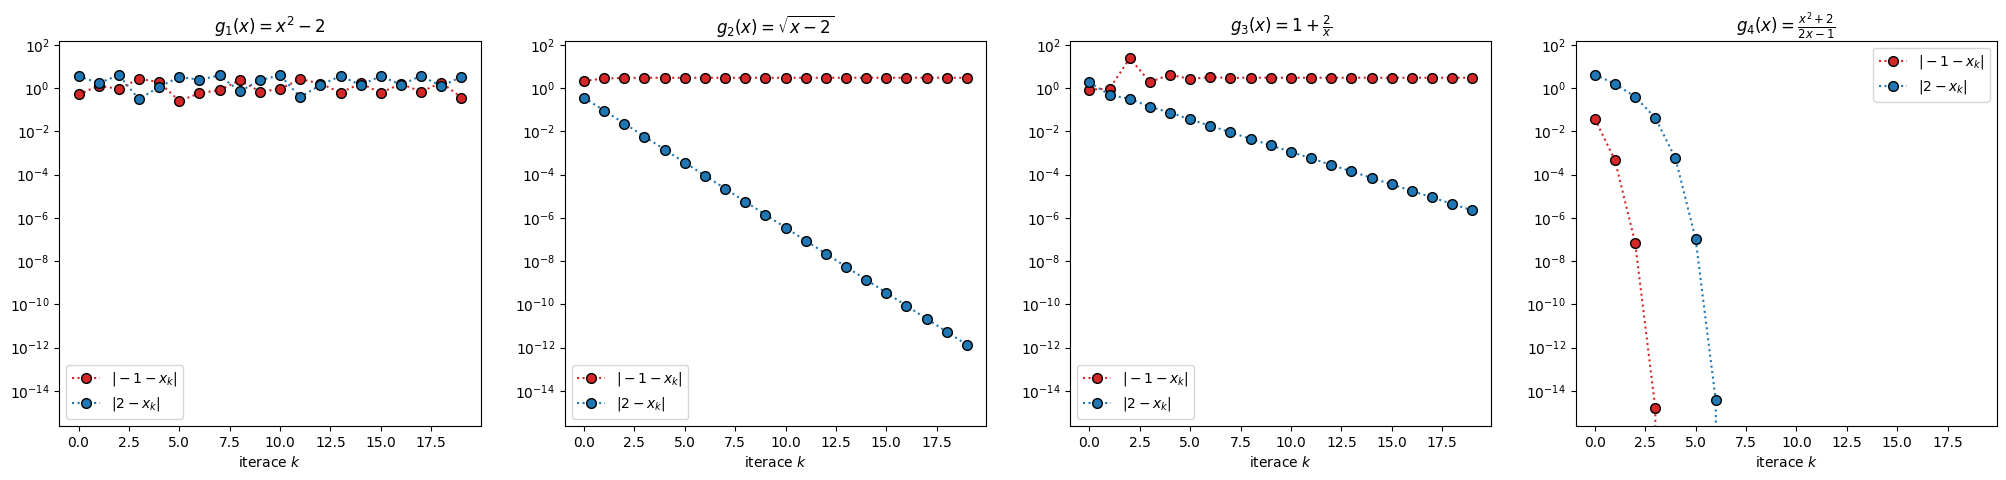

In [ ]:
def g1(x):
  return x**2-2
def g2(x):
  return np.sqrt(x+2)
def g3(x):
  return 1+2/x
def g4(x):
  return (x**2 +2)/(2*x-1)


# Vas kod
N = 20;

### g1
x0_root1 = -0.7; x0_root2 = 0.7
errg1_root1 = np.nan*np.zeros(N); errg1_root2 = np.nan*np.zeros(N)
for i in range(N):
  x0_root1 = g1(x0_root1);  x0_root2 = g1(x0_root2)
  errg1_root1[i] = np.abs(x0_root1+1); errg1_root2[i] = np.abs(x0_root2-2)

### g2
x0_root1 = -0.7; x0_root2 = 0.7
errg2_root1 = np.nan*np.zeros(N); errg2_root2 = np.nan*np.zeros(N)
for i in range(N):
  x0_root1 = g2(x0_root1);  x0_root2 = g2(x0_root2)
  errg2_root1[i] = np.abs(x0_root1+1); errg2_root2[i] = np.abs(x0_root2-2)

### g3
x0_root1 = -0.7; x0_root2 = 0.7
errg3_root1 = np.nan*np.zeros(N); errg3_root2 = np.nan*np.zeros(N)
for i in range(N):
  x0_root1 = g3(x0_root1);  x0_root2 = g3(x0_root2)
  errg3_root1[i] = np.abs(x0_root1+1); errg3_root2[i] = np.abs(x0_root2-2)

### g4
x0_root1 = -0.7; x0_root2 = 0.7
errg4_root1 = np.nan*np.zeros(N); errg4_root2 = np.nan*np.zeros(N)
for i in range(N):
  x0_root1 = g4(x0_root1);  x0_root2 = g4(x0_root2)
  errg4_root1[i] = np.abs(x0_root1+1); errg4_root2[i] = np.abs(x0_root2-2)


################################################# Vykreslovani - neni treba menit, pokud nechcete menit experiment
plt.figure(figsize=(25,5))
ax1 = plt.subplot(1,4,1)
plt.semilogy(errg1_root1, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label='$|-1 - x_k|$');
plt.semilogy(errg1_root2, 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label='$|2 - x_k|$'); plt.title(r'$g_1(x) = x^2-2$'); plt.xlabel("iterace $k$"); plt.legend()
plt.subplot(1,4,2, sharey=ax1)
plt.semilogy(errg2_root1, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label='$|-1 - x_k|$');
plt.semilogy(errg2_root2, 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label='$|2 - x_k|$'); plt.title(r'$g_2(x) = \sqrt{x-2}$'); plt.xlabel("iterace $k$"); plt.legend()
plt.subplot(1,4,3, sharey=ax1)
plt.semilogy(errg3_root1, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label='$|-1 - x_k|$');
plt.semilogy(errg3_root2, 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label='$|2 - x_k|$'); plt.title(r'$g_3(x) = 1+\frac{2}{x}$'); plt.xlabel("iterace $k$"); plt.legend()
plt.subplot(1,4,4, sharey=ax1)
plt.semilogy(errg4_root1, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label='$|-1 - x_k|$');
plt.semilogy(errg4_root2, 'o:', ms = 7, color = 'tab:blue', markeredgecolor='k', label='$|2 - x_k|$'); plt.title(r'$g_4(x) = \frac{x^2+2}{2x-1}$'); plt.xlabel("iterace $k$"); plt.legend()
plt.show()

### Úloha B3 - fixed-point chaos

Nyní si vezmeme další parametrizovanou funkci, tentokrát

  $$
  f_{\lambda}(x) = -\lambda x^2 + (\lambda-1)x,
  $$

pro $\lambda \in [0,4]$ a $x\in [0,1]$.

---
**Tužka a papír** :
- Odvoďte fixed-point metodu
  $$ g_{\lambda}(x) = \lambda x(1-x), $$
  opět parametrizovanou reálným skalárem $\lambda \in [0,4]$.

- Odvoďte zda jsou kořeny $f_{\lambda}$ pevné body $g_{\lambda}$.

- Pro které $\lambda \in [0,4]$ lze použít Banachova veta o kontrakci pro $g_{\lambda}$ na nějaké pomnožině $[0,1]$?

**Kódění** :
Pro počáteční bod $x_0=0.2$ vykreslete poslounost aproximací $x_1,x_2,\dotsc $ jednoho z kořenů $f_{\lambda}$ (pevných bodů $g_{\lambda}$) pro

  - $\lambda = 1$
  - $\lambda = 2.8$
  - $\lambda = 3.1$
  - $\lambda = 3.5$
  - $\lambda = 3.9$

  Uveďte tyto výsledky do kontextu teorie z přednášky.

---

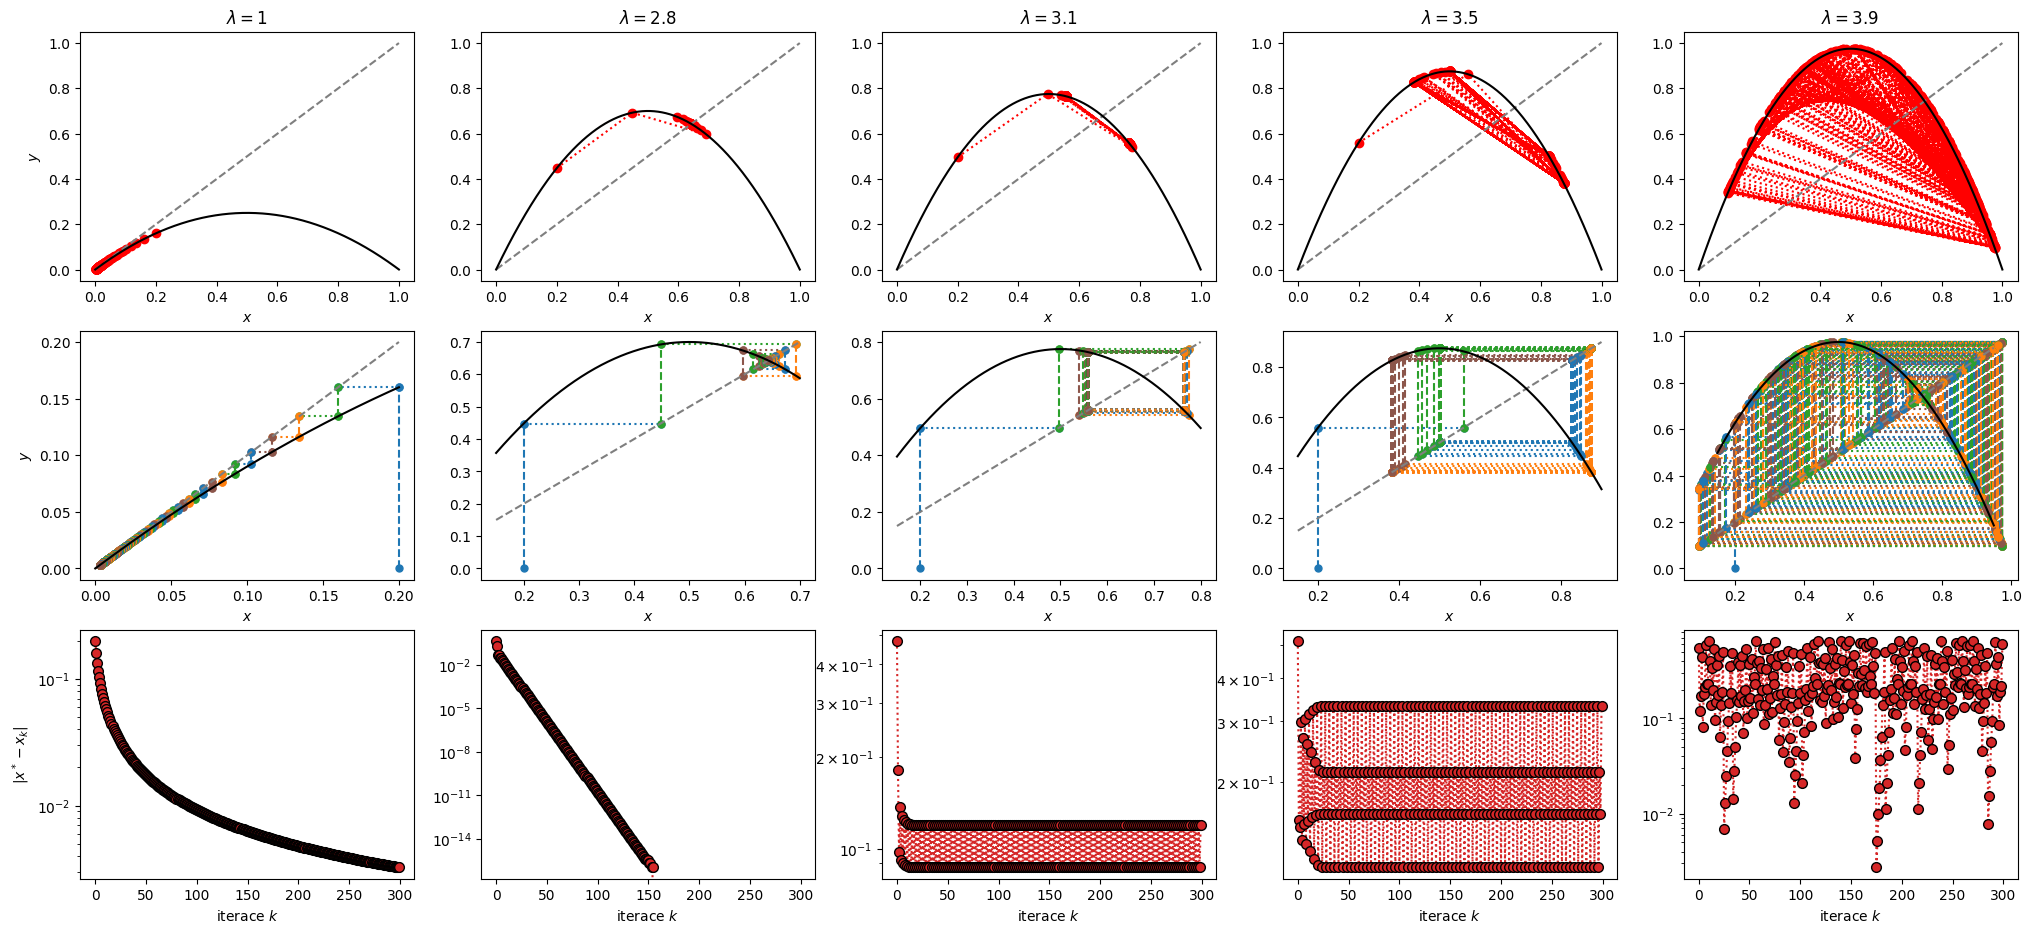

In [ ]:
def plotcobweb(x0,fx,axis):
  '''Funkce pouzivana k vykreslovani tzv. cobweb grafu v druhem radku obrazku nize.'''
  x_coords = np.nan * np.zeros(2*len(fx)); y_coords = np.nan * np.zeros_like(x_coords)
  x_coords[0] = x0; x_coords[1] = x0
  y_coords[0] = 0; y_coords[1] = fx[0]
  for i in range(0,len(fx)-1):
    x_coords[2 + 2*i] = fx[i]; x_coords[2 + 2*i+1] = fx[i]
    y_coords[2 + 2*i] = x_coords[2 + 2*i]; y_coords[2 + 2*i+1] = fx[i+1]
  MyColors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:brown']; colorind = 0
  for ind in range(0,len(x_coords),2):
    plt.plot(x_coords[ind:ind+2], y_coords[ind:ind+2], 'o--', ms=5, color = MyColors[ colorind ]);
    plt.plot( x_coords[ind+1:ind+3], y_coords[ind+1:ind+3], 'o:', ms=5, color = MyColors[ colorind ]);
    colorind = (colorind + 1) % len(MyColors)
  return
######################################################################################

def g(x,lambd):
  return ...

# inicializace
N = 300; x0 = 0.2;

### lambda = 1
lambda1 = 1
fixedpnt = # od ktereho fixpoint merime vzdalenost (a tedy chybu)
xcoords_l1 = # inicializace pole pro ukladani "x-ovych souradnic" tj. bodu x0, x1, x2, ....
ycoords_l1 = # inicializace pole pro ukladani "y-ovych souradnic" tj. bodu g(x0), g(x1), g(x2), ....
err_l1 = # inicializace pole pro ukladani chyby, tj. "|x_fixedpnt - x_k|""
# samotny vypocet
for i in range(N):
  xcoords_l1[i] =
  ycoords_l1[i] =
  err_l1[i] =


### lambda = 2.8

### lambda = 3.1

### lambda = 3.5

### lambda = 3.9



################################################# Vykreslovani
plotmesh = np.linspace(0,1,1000);
plt.figure(figsize=(25,11))

plt.subplot(3,5,1)
plt.plot(xcoords_l1,ycoords_l1,'ro:')
plt.plot(plotmesh,plotmesh,'--',color='tab:gray'); plt.plot(plotmesh,g(plotmesh,lambda1),'k-'); plt.title(r'$\lambda = 1$'); plt.ylabel("$y$"); plt.xlabel("$x$");
ax = plt.subplot(3,5,6)
plotmesh_zoom = np.linspace(0,0.2,1000);
plotcobweb(0.2,ycoords_l1,ax);  plt.ylabel("$y$"); plt.xlabel("$x$");
plt.plot(plotmesh_zoom,plotmesh_zoom,'--',color='tab:gray'); plt.plot(plotmesh_zoom,g(plotmesh_zoom,lambda1),'k-');
plt.subplot(3,5,11)
plt.xlabel("iterace $k$"); plt.ylabel("$|x^* - x_k|$"); plt.semilogy(err_l1, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k', label='konv. k 0');

plt.subplot(3,5,2)
plt.plot(xcoords_l2,ycoords_l2,'ro:'); plt.plot(plotmesh,plotmesh,'--',color='tab:gray', label='y=x'); plt.plot(plotmesh,g(plotmesh,lambda2),'k-'); plt.title(r'$\lambda = 2.8$'); plt.xlabel("$x$");
ax = plt.subplot(3,5,7)
plotmesh_zoom = np.linspace(0.15,0.7,1000);
plotcobweb(0.2,ycoords_l2,ax); plt.xlabel("$x$");
plt.plot(plotmesh_zoom,plotmesh_zoom,'--',color='tab:gray'); plt.plot(plotmesh_zoom,g(plotmesh_zoom,lambda2),'k-');
plt.subplot(3,5,12)
plt.xlabel("iterace $k$"); plt.semilogy(err_l2, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k');

plt.subplot(3,5,3)
plt.plot(xcoords_l3,ycoords_l3,'ro:'); plt.plot(plotmesh,plotmesh,'--',color='tab:gray'); plt.plot(plotmesh,g(plotmesh,lambda3),'k-'); plt.title(r'$\lambda = 3.1$'); plt.xlabel("$x$");
ax = plt.subplot(3,5,8)
plotmesh_zoom = np.linspace(0.15,0.8,1000);
plotcobweb(0.2,ycoords_l3,ax); plt.xlabel("$x$");
plt.plot(plotmesh_zoom,plotmesh_zoom,'--',color='tab:gray'); plt.plot(plotmesh_zoom,g(plotmesh_zoom,lambda3),'k-');
plt.subplot(3,5,13)
plt.xlabel("iterace $k$"); plt.semilogy(err_l3, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k');

plt.subplot(3,5,4)
plt.plot(xcoords_l4,ycoords_l4,'ro:'); plt.plot(plotmesh,plotmesh,'--',color='tab:gray'); plt.plot(plotmesh,g(plotmesh,lambda4),'k-'); plt.title(r'$\lambda = 3.5$'); plt.xlabel("$x$");
ax = plt.subplot(3,5,9)
plotmesh_zoom = np.linspace(0.15,0.9,1000);
plotcobweb(0.2,ycoords_l4,ax); plt.xlabel("$x$");
plt.plot(plotmesh_zoom,plotmesh_zoom,'--',color='tab:gray'); plt.plot(plotmesh_zoom,g(plotmesh_zoom,lambda4),'k-');
plt.subplot(3,5,14)
plt.xlabel("iterace $k$"); plt.semilogy(err_l4, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k');

plt.subplot(3,5,5)
plt.plot(xcoords_l5,ycoords_l5,'ro:'); plt.plot(plotmesh,plotmesh,'--',color='tab:gray'); plt.plot(plotmesh,g(plotmesh,lambda5),'k-'); plt.title(r'$\lambda = 3.9$'); plt.xlabel("$x$");
ax = plt.subplot(3,5,10)
plotmesh_zoom = np.linspace(0.15,0.95,1000);
plotcobweb(0.2,ycoords_l5,ax); plt.xlabel("$x$");
plt.plot(plotmesh_zoom,plotmesh_zoom,'--',color='tab:gray'); plt.plot(plotmesh_zoom,g(plotmesh_zoom,lambda5),'k-');
plt.subplot(3,5,15)
plt.xlabel("iterace $k$"); plt.semilogy(err_l5, 'o:', ms = 7, color = 'tab:red', markeredgecolor='k');
################################################# Vykreslovani

### ZÚ - Fixed-point metody jako staří známí

Vezmeme si čtvercovou matici $A\in \mathbb{R}^{n\times n}$ a vektor $\mathbf{b}\in \mathbb{R}^{n}$.

---
**Tužka a papír** :

Odvoďte stacionární metodu pro $A\mathbf{x}=\mathbf{b}$ založenou na štěpení $A=M-N$ jako fixed-point metodu.
  - Odvoďte zobrazení, na které byste Banachovu větu použili.
  - Odvoďte, za jakých podmínek lze Banachovu větu použít.
  - Porovnejte s podmínkami na konvergenci ze 3. cvičení.

---

## [Kvíz](https://forms.gle/cJxgwtHmyFGHmpkp6)